In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install pyarrow

In [4]:
all_data = pd.read_feather("/content/Sales_data.ftr")

In [5]:
all_data.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"


In [7]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [13]:
data = all_data.dropna(how='all')

In [15]:
data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [18]:
data.duplicated().sum()

618

In [21]:
df= data.drop_duplicates()

In [22]:
df.duplicated().sum()

0

In [23]:
df.shape

(185687, 6)

### Which is the best month of Sale?
The data has no order value columns but has order quantity and price each

Creating Month column from date

In [24]:
def return_month(x):
  return x.split('/')[0]

In [25]:
df['Month'] = df['Order Date'].apply(return_month)

<ipython-input-25-5b5e1ad2ce42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order Date'].apply(return_month)


In [27]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [28]:
df['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [30]:
filter1= df['Month'] == 'Order Date'

In [31]:
df[filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [33]:
df = df[~filter1]

In [34]:
df['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [41]:
#Converting dtype of month from object to INT
df['Month'] = df['Month'].astype(int)

In [40]:
from warnings import filterwarnings
filterwarnings('ignore')

In [42]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [43]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [44]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [45]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

<Axes: xlabel='Month'>

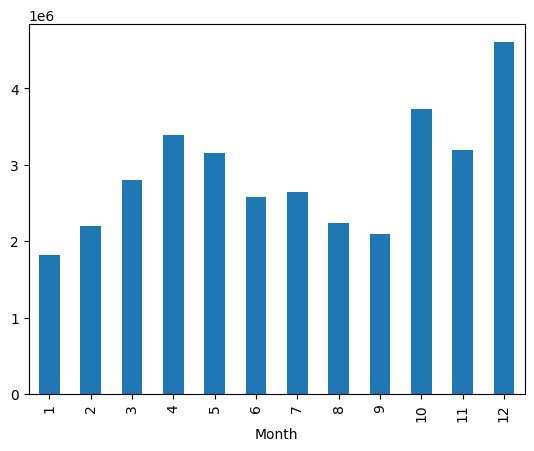

In [47]:
df.groupby(['Month'])['Sales'].sum().plot(kind='bar')

### Which City has Maximum order
However the data doesn't hahve city column, so we will use Purchase Address col. to create City col.

In [48]:
def return_city(x):
  return x.split(',')[1]

In [49]:
df['City'] = df['Purchase Address'].apply(return_city)

In [50]:
df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [51]:
#Another way is using string functions
df['City'] = df['Purchase Address'].str.split(',').str.get(1)

In [52]:
pd.value_counts(df['City'])

 San Francisco    44662
 Los Angeles      29564
 New York City    24847
 Boston           19901
 Atlanta          14863
 Dallas           14797
 Seattle          14713
 Portland         12449
 Austin            9890
Name: City, dtype: int64

<Axes: ylabel='City'>

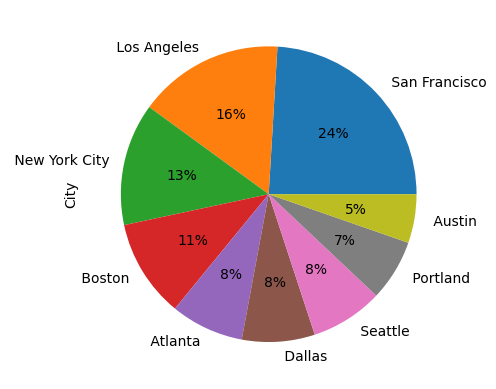

In [54]:
pd.value_counts(df['City']).plot(kind='pie', autopct = '%1.0f%%')

### Which product sold the most & Why?
It could be because of High rating or/and Low price

In [56]:
top_prod = df.groupby(['Product']).agg({'Quantity Ordered':'sum' , 'Price Each': 'mean'})

In [62]:
top_prod.sort_values('Quantity Ordered', ascending=False)

,Quantity Ordered,Price Each
Product,,
AAA Batteries (4-pack),30986,2.99
AA Batteries (4-pack),27615,3.84
USB-C Charging Cable,23931,11.95
Lightning Charging Cable,23169,14.95
Wired Headphones,20524,11.99
Apple Airpods Headphones,15637,150.00
Bose SoundSport Headphones,13430,99.99
27in FHD Monitor,7541,149.99
iPhone,6847,700.00


### What is the trend of the most sold Product

In [78]:
#The most sold product
most_sold = df['Product'].value_counts()[0:5].index
most_sold

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [79]:
most_sold_df = df[df['Product'].isin(most_sold)]
most_sold_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",9,2.99,Dallas
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles


In [81]:
most_sold_df.groupby(['Month', 'Product']).size()

Month  Product                 
1      AA Batteries (4-pack)       1037
       AAA Batteries (4-pack)      1084
       Lightning Charging Cable    1069
       USB-C Charging Cable        1171
       Wired Headphones            1004
2      AA Batteries (4-pack)       1274
       AAA Batteries (4-pack)      1320
       Lightning Charging Cable    1393
       USB-C Charging Cable        1511
       Wired Headphones            1179
3      AA Batteries (4-pack)       1672
       AAA Batteries (4-pack)      1645
       Lightning Charging Cable    1749
       USB-C Charging Cable        1766
       Wired Headphones            1512
4      AA Batteries (4-pack)       2062
       AAA Batteries (4-pack)      1988
       Lightning Charging Cable    2197
       USB-C Charging Cable        2074
       Wired Headphones            1888
5      AA Batteries (4-pack)       1821
       AAA Batteries (4-pack)      1888
       Lightning Charging Cable    1929
       USB-C Charging Cable        1879
       W

In [83]:
pivot = most_sold_df.groupby(['Month', 'Product']).size().unstack()
pivot

Product,AA Batteries (4-pack),AAA Batteries (4-pack),Lightning Charging Cable,USB-C Charging Cable,Wired Headphones
Month,,,,,
1,1037,1084,1069,1171,1004
2,1274,1320,1393,1511,1179
3,1672,1645,1749,1766,1512
4,2062,1988,2197,2074,1888
5,1821,1888,1929,1879,1729
6,1540,1451,1560,1531,1334
7,1555,1554,1690,1667,1434
8,1357,1340,1354,1339,1191
9,1314,1281,1324,1451,1173


<Axes: xlabel='Month'>

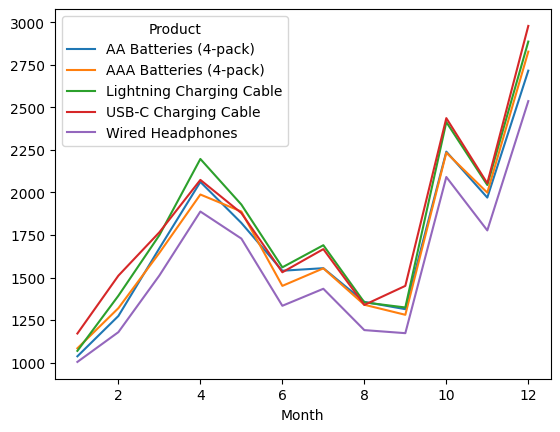

In [84]:
pivot.plot()

### What products are often Purchased by Customers

In [88]:
df_duplicated = df[df['Order ID'].duplicated(keep = False)]

In [96]:
df_dup = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x: ', '.join(x)).reset_index().rename(columns={'Product':'Grouped_products'})

In [114]:
df_dup

,Order ID,Grouped_products
0,141275,"USB-C Charging Cable, Wired Headphones"
1,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
2,141365,"Vareebadd Phone, Wired Headphones"
3,141384,"Google Phone, USB-C Charging Cable"
4,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop, Wired Headphones"
6875,319556,"Google Phone, Wired Headphones"
6876,319584,"iPhone, Wired Headphones"
6877,319596,"iPhone, Lightning Charging Cable"


In [98]:
dup = df_duplicated.merge(df_dup, how = 'left', on ='Order ID')

In [115]:
dup

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Grouped_products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone, Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone, Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone, USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone, USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack), Google Phone"
...,...,...,...,...,...,...,...,...,...,...
14123,259303,AA Batteries (4-pack),1,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta,"34in Ultrawide Monitor, AA Batteries (4-pack)"
14124,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,"Wired Headphones, AAA Batteries (4-pack)"
14125,259314,AAA Batteries (4-pack),2,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta,"Wired Headphones, AAA Batteries (4-pack)"
14126,259350,Google Phone,1,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco,"Google Phone, USB-C Charging Cable"


In [100]:
dup_df = dup.drop_duplicates(subset = ['Order ID'])

In [110]:
paired_prod = dup_df['Grouped_products'].value_counts().sort_values(ascending = False)[0:5]

<Axes: >

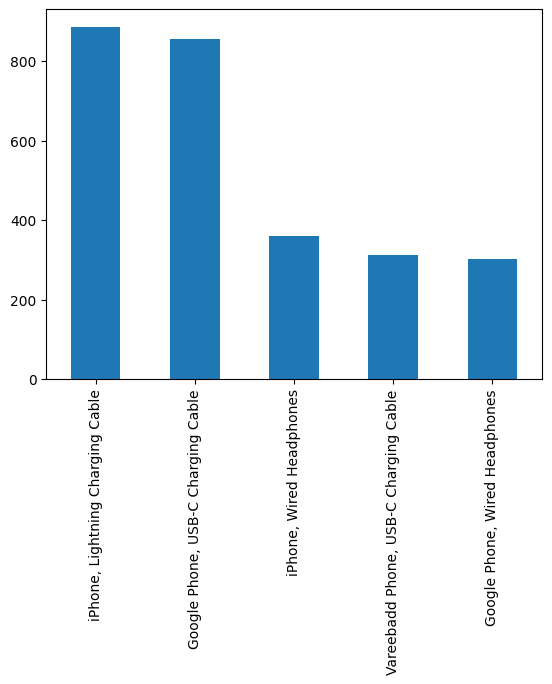

In [112]:
paired_prod.plot(kind='bar')